Harris角点检测（灰度图）

dst = cv2.cornerHarris(img, blockSize, ksize, k)

blockSize:窗口大小
ksize：卷积核边长
k:权重系数，在0.02-0.04之间

(-0.5, 636.5, 634.5, -0.5)

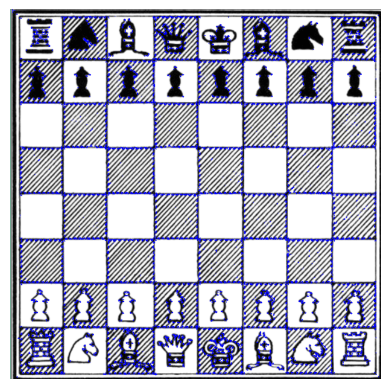

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

#读取图像
img = cv2.imread("chess_board.png")

#灰度化
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

#Harris角点检测函数
dst = cv2.cornerHarris(src = gray, blockSize = 2, ksize = 3, k = 0.04)

#图像中大于0.01*dst.max()的角点标记颜色
img[dst > 0.01*dst.max()] = (0,0,255)

#展示处理
plt.imshow(img, cmap='gray')
plt.axis('off')

Shi-Tmasi角点检测（灰度图）

Shi-Tomasi是Harris角点检测的改进（k值的取值不同）
Shi-Tomasi也可以通过useHarrisDetector进行Harris角点检测

dst = cv2.goodFeaturesToTrack(img, maxCorners, qualityLevel, minDistance，mask
                            blockSize，useHarrisDetector，k )
                            
maxCorners:角点的最大数，值为0时代表无限制
qualityLevel：角点质量，一般在0.01-0.1之间
minDistance：角点间的最小距离,值越大，检测角越多
mask：可选参数，不设置的默认对整张图像进行角点检测
useHarrisDector: 是否使用Harris算法，true/false 
k :权重系数：默认为0.04

函数应用

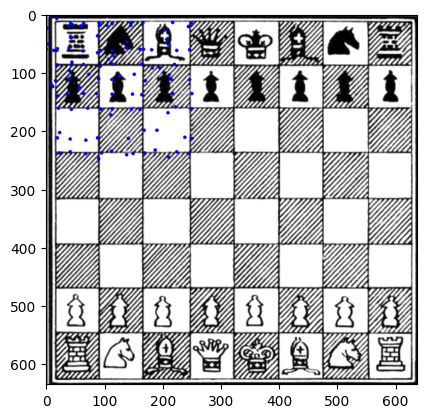

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

#读取图像
img = cv2.imread("chess_board.png")

#灰度化
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

#Harris角点检测函数
dst = cv2.goodFeaturesToTrack(gray, maxCorners = 1000, qualityLevel = 0.01, minDistance = 50, blockSize = 9)

#浮点型转换成整型
dst = np.uint8(dst)

#展示处理
#Shi-Tomas绘制角点
for i in dst:
    x,y = i.ravel()#将dst转成一维数组
    cv2.circle(img, (x,y), 3, (0,0,255), -1)

plt.imshow(img, cmap='gray')
#plt.axis('off')

2.SIFT关键点检测(灰度化)
优点：角点检测准确，描述子也比较精确
缺点：速度慢

关键点检测

与说话无关的特征转换（最重要的获取特征点的方法之一）

Harris角点检测：但图片角的像素较小时，能检测出角：放大后就不能检测出来。

SIFT都能检测出来

用法：
1.创建SIFT对象 cv2.SIFT_create()
2.进行检测，kp=sift.detect(img,...) 获取特征点 kp = sift.detect(gray, None)
3.绘制关键点 cv2.drawKeypoints(gray, kp, img)

(-0.5, 868.5, 433.5, -0.5)

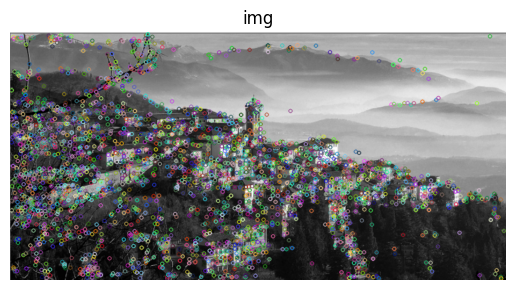

In [10]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread("varese.jpg")
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# 创建SIFT对象 xfeatures2d是扩展包，版权
sift = cv2.SIFT_create()
# 获取特征点 None表示对整张图进行检测
kp = sift.detect(gray, None) # kp即为特征点
#绘制关键点
cv2.drawKeypoints(gray, kp, img)
#在img的gray图像上标出关键点，最后输出img图像
# gray：原始图像
# kp：关键点
# img：输出图像

plt.imshow(img)
plt.title('img')
plt.axis('off')

SIFT计算描述子


关键点和描述子
关键点：位置，大小和方向

描述子：有利关键点检测的向量值
kp, des = sift.compute(img, kp)

SIFT同时计算关键点和描述子

kp, des = sift.detectAndCompute(img, None)
mask: 可选参数

(-0.5, 868.5, 433.5, -0.5)

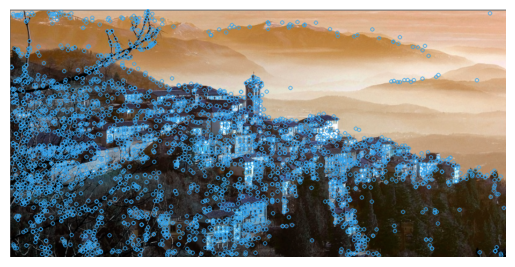

In [18]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread("varese.jpg")
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

sift = cv2.SIFT_create()
#获取关键点和描述子
kp, des = sift.detectAndCompute(gray, None)

#绘制keypoings图像
cv2.drawKeypoints(img, kp, img, (51,163,236), cv2.DRAW_MATCHES_FLAGS_DEFAULT)

plt.imshow(img)
plt.axis('off')

 3.SURF特征检测算法

加速的鲁棒性特征检测
优点：处理速度快（可同时对一系列图片进行检测）
     保留SIFT的优点

用法：
创建SURF对象                        surf = CV2.SURF.create()
获取SURF的关键点和描述子            kp, des = surf.detectAndCompute(img, None)
在原图上绘制关键点，描述子          img = cv2.drawKeypoints(gray, kp, img, (51,163,236), cv2.DRAW_MATCHES_FLAGS_DEFAULT)

In [9]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread("varese.jpg")
#灰度化
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
#穿件SURF对象
#surf = cv2.xfeatures2d.SURF_create()

surf = cv2.SURF_create()
#使用SURF进行特征检测
kp, dst = surf.detectAndCompute(img, None)
#显示图像
#在原图像上绘制关键点
img = cv2.drawKeypoints(gray, kp, img, (51,163,236))
plt.imshow(img)



AttributeError: module 'cv2' has no attribute 'SURF_create'

4. BLOB检测


创建BLOB对象                detector = cv2.SimpleBlobDetector_create()
获取BLOB关键点和描述子      keypoints = detector.detect(img, None)
在原图上绘制关键点          img3 = cv2.drawKeypoints(img, kp, np.array[], (0,0,255), cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

(-0.5, 311.5, 211.5, -0.5)

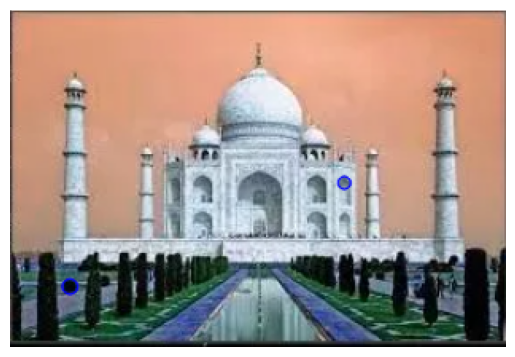

In [21]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread("det_1.jpg")
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
# 创建BLOE对象
detector = cv2.SimpleBlobDetector_create()
# 获取BLOB关键点
kp = detector.detect(gray, None)
# 在图像上绘制关键点
img3 = cv2.drawKeypoints(img, kp, np.array([]), (0,0,255), cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

plt.imshow(img3)
plt.axis('off')

5.ORB检测（Oriented FAST and Rotated BRIEF）

优点：实时检测                      缺点：计算准确率抵于其他算法
    提高对特征点检测的速度  
    提高了对描述子检测的速度
    适用于大量图片检测

用法：
创建对象：              orb = cv2.ORB_create()
获取关键点和描述子：    kp, dst = orb.detectAndCompute(img, None)
绘制关键点：            img = cv2.drawKeypoints(gray, kp, img, (255,0,0), ...)


(-0.5, 636.5, 634.5, -0.5)

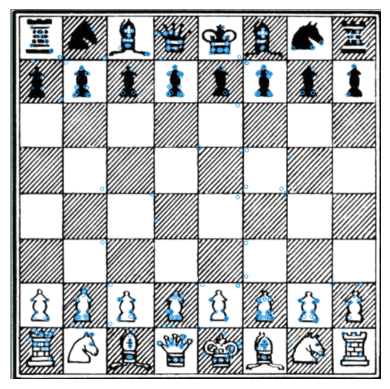

In [13]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

#img = cv2.imread("varese.jpg")
img = cv2.imread("chess_board.png")
#灰度化
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
#穿件ORB对象
orb = cv2.ORB_create()
#使用ORB进行特征检测
kp, dst = orb.detectAndCompute(img, None)
#显示图像
#在原图像上绘制关键点
img = cv2.drawKeypoints(img, kp, img, (51,163,236))
plt.imshow(img)
plt.axis('off')

暴力特征匹配


BF( Brute-Force )：以枚举为主：使用第一组中的每个特征的描述子与第二组中的所有特征描述子进行匹配...
计算差值（相似度），返回相似度最高的值

用法：
创建匹配器：
bf = cv2.BFMatcher(normType, crossCheck)
normType: NORM_L1，NORM_L2, HAMMING1 （默认：NORM_L2）
crossCheck:是否进行交叉匹配，默认为false

进行特征匹配:match = bf.match(des1, des2)

绘制匹配点：cv2.drawMatches(img1, kp1, img2, kp2, match, None)
搜索图 img1，kp1
匹配图 img2，kp2

(-0.5, 564.5, 406.5, -0.5)

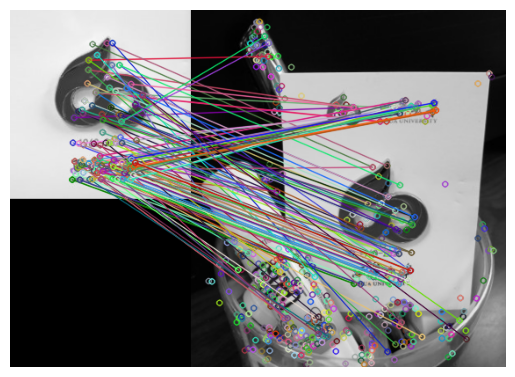

In [7]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img1 = cv2.imread("xhu1.jpg")
img2 = cv2.imread("xhu2.jpg")

g1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
g2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)
# 创建SIFT对象
sift = cv2.SIFT_create()
#得到特征点，描述点
kp1, des1 = sift.detectAndCompute(g1,None)
kp2, des2 = sift.detectAndCompute(g2,None)
#创建匹配器
bf = cv2.BFMatcher(cv2.NORM_L2)
#使用bf暴力匹配
match = bf.match(des1, des2)
#根据匹配结果从库里找出图像
img3 = cv2.drawMatches(img1, kp1, img2, kp2, match, None)

plt.imshow(img3)
plt.axis('off')

FLANN特征匹配

创建FLANN匹配器： flann = cv2.FlannBasedMatcher(index_params字典， search_params字典)
index_params字典：匹配算法KDTREE，LSH
index_params=dict(algorithm = FLANN_INDEX_KDTREE, trees = 5)

search_params字典：指定KOTREE算法中遍历树的次数
search_params = dict(checks=50)

进行特征匹配：DMatch = flann.match/knnMatch(dst, k)
dst:SIFT、SURF、ORB等描述子
k：取距离最近的前k个关键点

绘制匹配点： cv2.drawMatches/drawMatchesKnn(img1, kp1, img2, kp2, match, None)


(-0.5, 564.5, 406.5, -0.5)

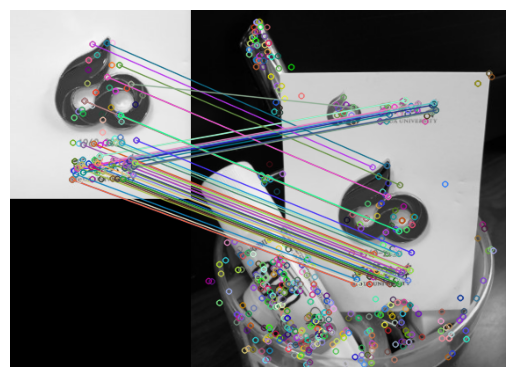

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt 

img1 = cv2.imread("xhu1.jpg")
img2 = cv2.imread("xhu2.jpg")

#灰度化
g1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
g2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)
#创建SIFT特征检测器
sift = cv2.SIFT_create()

#计算关键点和描述子
kp1, dst1 = sift.detectAndCompute(g1, None)
kp2, dst2 = sift.detectAndCompute(g2, None)

#创建匹配器
index_palams = dict(algorithm = 1, trees = 5)
search_palams = dict(checks = 50)
flann = cv2.FlannBasedMatcher(index_palams, search_palams)

#对描述子进行匹配计算
img3 = flann.knnMatch(dst1, dst2, k=2)

#过滤匹配点
good = []
for i, (m, n) in enumerate(img3):
    if m.distance < 0.7 * n.distance:
        good.append(m)

ret = cv2.drawMatchesKnn(img1, kp1, img2, kp2, [good], None)

plt.imshow(ret)
plt.axis('off')